<a href="https://colab.research.google.com/github/Giselle-Del-Sent/analise-da-receita-tributaria-brasileira/blob/main/Projeto_Receita_Tribut%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da Receita Tributária Anual no Período de 2002 a 2021**

# Objetivo

Este projeto tem como objetivo analisar a evolução da receita tributária brasileira em relação ao Produto Interno Bruto (PIB) no período de 2002 a 2021, com o apoio de visualizações gráficas que permitam identificar variações, tendências e possíveis causas associadas a eventos econômicos e conjunturais, como crises financeiras e a pandemia da Covid-19.
Além disso, busca-se examinar a composição da arrecadação por tipo de tributo e a participação relativa de cada esfera de governo — federal, estadual e municipal —, evidenciando a concentração federativa e os desdobramentos dessa estrutura no contexto fiscal do país.

---


# Sobre o conjunto de dados

O conjunto de dados foi obtido do site do Governo. Ele representa a receita tributária anual e o percentual do PIB para diferentes tributos no Brasil entre 2002 e 2021. Cada linha da tabela contém as seguintes informações:

*   Ano-calendário: Informa o ano calendário a que se refere a receita tributária arrecadada;
*   Competência: A categoria de tributos, como "Total dos Tributos União" ou "Tributos do Governo Federal";
*   Orçamento: A alocação orçamentária, por exemplo, "União" ou "Orçamento Fiscal";
*   Descrição: Uma descrição detalhada do tipo de tributo ou receita;
*   Valor da Receita Tributária: Informa o valor total da receita tributária obtida naquele ano-calendário;
*   Percentual do PIB: Informa o percentual do valor total do PIB calculado naquele ano-calendário pelo IBGE.

Esses dados permitem analisar a evolução da arrecadação tributária em relação ao crescimento econômico do país, facilitando a identificação de tendências e possíveis causas de variações, bem como permite analisar os tributos e a representatividade de cada esfera de governo sobre a receita tributária total no período. ​

---


# Processamento dos dados e análises

In [122]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Importar os dados em arquivo csv
file_path = '/content/Tabela 2 - Tributo e Competência.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
data.head()

,Ano-calendário,Competência,Orçamento,Descrição,Valor da Receita Tributária,Percentual do PIB
0,2002,Total dos Tributos União,União,Total da Receita Tributária,"477725,6437","0,320882411"
1,2002,Tributos do Governo Federal,Orçamento Fiscal,Tributos do Governo Federal,"330496,8209","0,22199063"
2,2002,Tributos do Governo Federal,Orçamento Fiscal,Orçamento Fiscal,"117337,9936","0,07881448"
3,2002,Tributos do Governo Federal,Orçamento Fiscal,Imposto de Renda - Total,"83528,69112","0,05610519"
4,2002,Tributos do Governo Federal,Orçamento Fiscal,Imposto de Renda - Pessoas Físicas,"4078,31919","0,002739357"


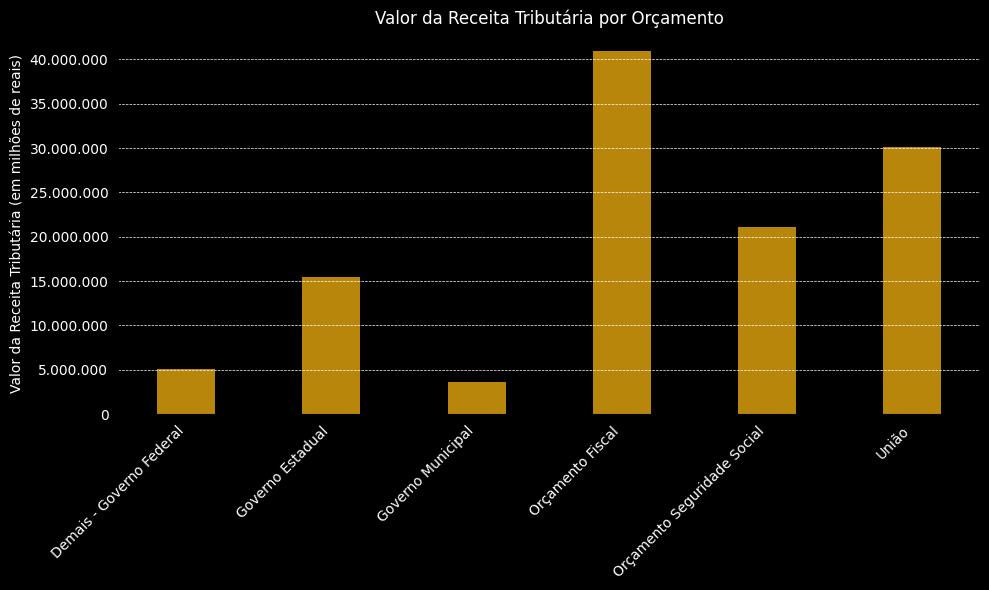

In [123]:
# Converter os valores da coluna 'Valor da Receita Tributária' para float
data['Valor da Receita Tributária'] = data['Valor da Receita Tributária'].str.replace(',', '.').astype(float)

# Agrupar por "Orçamento" e somar "Valor da Receita Tributária"
grouped_data = data.groupby('Orçamento')['Valor da Receita Tributária'].sum().reset_index()

# Função para formatar o eixo y
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Orçamento'], grouped_data['Valor da Receita Tributária'], color='#B8860B', width=0.4)

# Adicionar título e rótulos
plt.title('Valor da Receita Tributária por Orçamento', color='white')
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', color='white')

# Ajustar formatação dos eixos e cores
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Ao analisar o gráfico "Valor da Receita Tributária por Orçamento", observa-se que o Orçamento Fiscal possui a maior representatividade em comparação com os demais orçamentos. Isso indica que uma parcela significativa da receita tributária é gerada através de tributos alocados ao Orçamento Fiscal, destacando sua importância relativa dentro do contexto geral das finanças públicas.

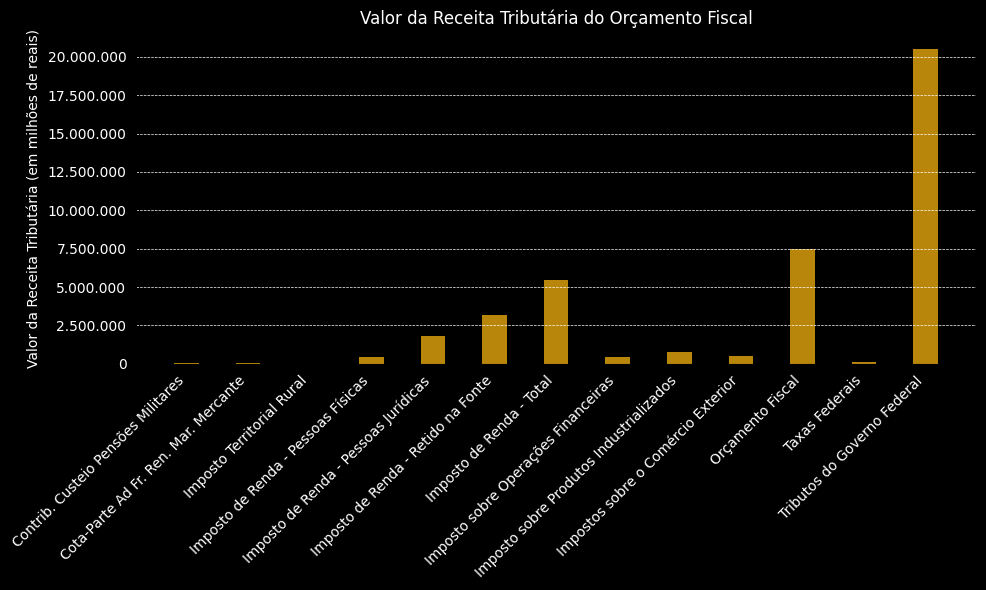

In [124]:
# Filtrar os dados para obter apenas o orçamento fiscal
grouped_fiscal_data = data[data['Orçamento'] == 'Orçamento Fiscal'].groupby('Descrição')['Valor da Receita Tributária'].sum().reset_index()

# Configurar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_fiscal_data['Descrição'], grouped_fiscal_data['Valor da Receita Tributária'], color='#B8860B', width=0.4)

# Adicionar título e rótulos
plt.title('Valor da Receita Tributária do Orçamento Fiscal', color='white')
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', color='white')

# Ajustar formatação dos eixos e cores
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Considerando a predominância do Orçamento Fiscal, decidimos aprofundar a análise para identificar quais grupos de tributos se destacam em relação aos demais. Ao examinar o gráfico "Valor da Receita Tributária do Orçamento Fiscal", fica evidente que os tributos do governo federal têm a maior representatividade, superando os outros grupos. Isso sugere que a maior parte da receita tributária no Orçamento Fiscal é proveniente dos tributos administrados pelo governo federal, destacando sua importância no cenário fiscal do país.

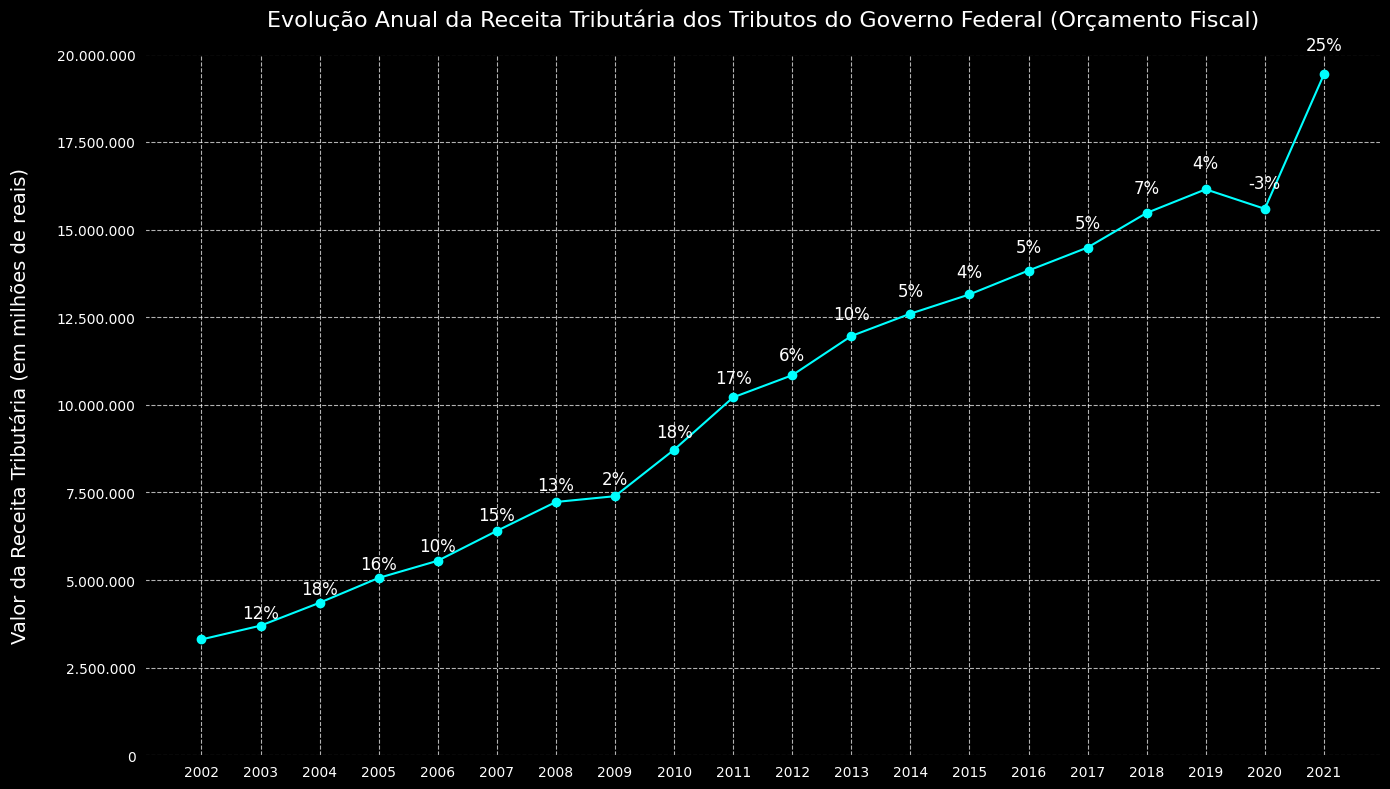

In [125]:
# Filtrar os dados para obter apenas o orçamento fiscal e tributos do governo federal
data_fiscal_federal = data[(data['Orçamento'] == 'Orçamento Fiscal') & (data['Descrição'] == 'Tributos do Governo Federal')]

# Agrupar por ano e somar os valores da receita tributária
annual_revenue = data_fiscal_federal.groupby('Ano-calendário')['Valor da Receita Tributária'].sum().reset_index()

# Multiplicar os valores por 10 para ajustar para milhões
annual_revenue['Valor da Receita Tributária'] = annual_revenue['Valor da Receita Tributária'] * 10

# Calcular a variação percentual e absoluta ano a ano
annual_revenue['Percentual Crescimento'] = annual_revenue['Valor da Receita Tributária'].pct_change() * 100
annual_revenue['Variação Absoluta'] = annual_revenue['Valor da Receita Tributária'].diff()

# Função para formatar o eixo y
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Configurar o gráfico
plt.figure(figsize=(14, 8))
plt.plot(annual_revenue['Ano-calendário'], annual_revenue['Valor da Receita Tributária'], marker='o', color='cyan', linestyle='-')

# Adicionar título e rótulos
plt.title('Evolução Anual da Receita Tributária dos Tributos do Governo Federal (Orçamento Fiscal)', fontsize=16, color='white', pad=20)
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', fontsize=14, color='white', labelpad=20)

# Ajustar formatação dos eixos e cores
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, linestyle='--', alpha=0.7, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# Definir o limite do eixo y para 20 milhões
plt.ylim(0, 20000000)

# Adicionar rótulos com o percentual de crescimento em cada ano
for i in range(1, len(annual_revenue)):
    x = annual_revenue['Ano-calendário'].iloc[i]
    y = annual_revenue['Valor da Receita Tributária'].iloc[i]
    pct_crescimento = annual_revenue['Percentual Crescimento'].iloc[i]
    plt.text(x, y + y * 0.03, f'{pct_crescimento:.0f}%', fontsize=12, ha='center', va='bottom', color='white')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Dada a significativa representatividade dos tributos do Governo Federal, arrecadados por meio do Orçamento Fiscal, o gráfico "Evolução Anual da Receita Tributária dos Tributos do Governo Federal (Orçamento Fiscal)" permite visualizar o crescimento dessas receitas ao longo dos anos. Observa-se um aumento constante na arrecadação até 2019. No entanto, em 2020, houve uma queda de 3%, provavelmente devido aos impactos econômicos causados pela pandemia de Covid-19. Em 2021, a arrecadação mostrou uma expressiva recuperação de 25%, indicando uma retomada econômica robusta e a eficácia das medidas de estímulo e recuperação implementadas pelo governo.

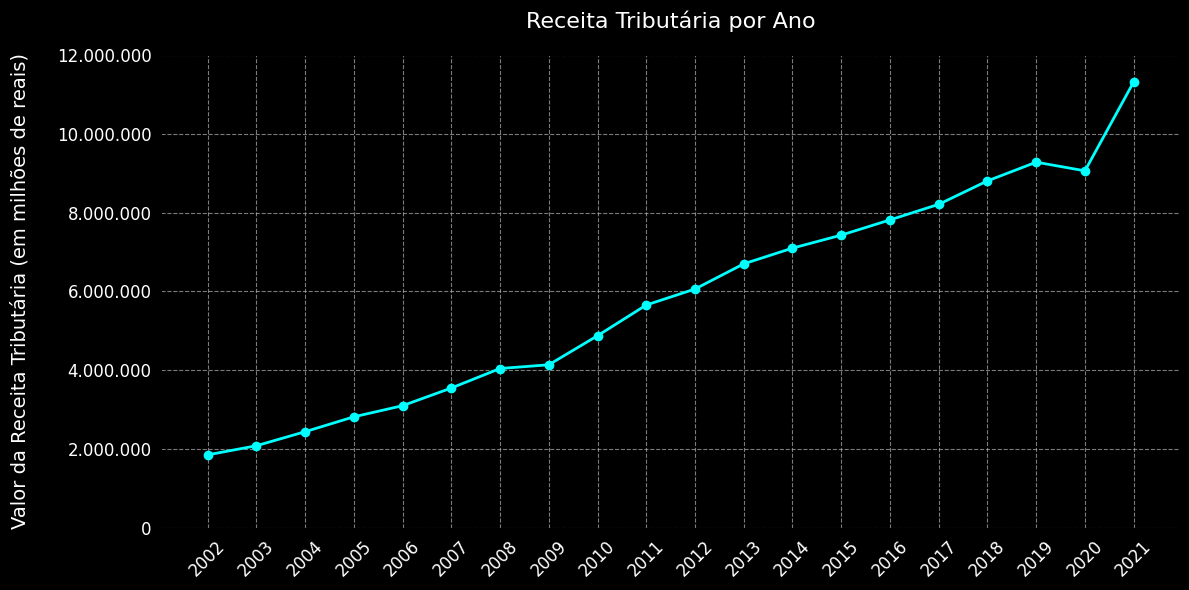

In [126]:
# Converter a coluna 'Percentual do PIB' para o formato numérico
data['Percentual do PIB'] = data['Percentual do PIB'].str.replace(',', '.').astype(float)

# Agregar os dados por ano
annual_data = data.groupby('Ano-calendário').agg({
    'Valor da Receita Tributária': 'sum',
    'Percentual do PIB': 'mean'
}).reset_index()

# Função para formatar o eixo y
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Configurar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(annual_data['Ano-calendário'], annual_data['Valor da Receita Tributária'], marker='o', color='cyan', linestyle='-', linewidth=2, markersize=6)

# Adicionar título e rótulos
plt.title('Receita Tributária por Ano', fontsize=16, color='white', pad=20)
plt.ylabel('Valor da Receita Tributária (em milhões de reais)', fontsize=14, color='white', labelpad=20)

# Ajustar formatação dos eixos e cores
plt.xticks(annual_data['Ano-calendário'], rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

# Definir o limite do eixo y para 12 milhões
plt.ylim(0, 12000000)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Para complementar, no gráfico "Receita Tributária por Ano", é possível verificar o valor total da receita tributária arrecadada em cada ano. Ao analisar esse gráfico em paralelo com o gráfico anterior, percebe-se que a receita tributária apresentava um crescimento contínuo desde 2002. Em particular, entre 2007 e 2008, houve um aumento significativo de 13%. No entanto, entre 2008 e 2009, nota-se uma estabilidade no crescimento da receita tributária, provavelmente devido à crise financeira mundial de 2008. Durante esse período, políticas fiscais e econômicas adotadas pelo governo podem ter desempenhado um papel crucial na estabilização da economia, mitigando os efeitos adversos da crise e, por consequência, estabilizando a arrecadação tributária. Isso evidencia a resiliência das políticas econômicas implementadas e a capacidade de resposta do sistema tributário em tempos de crise.

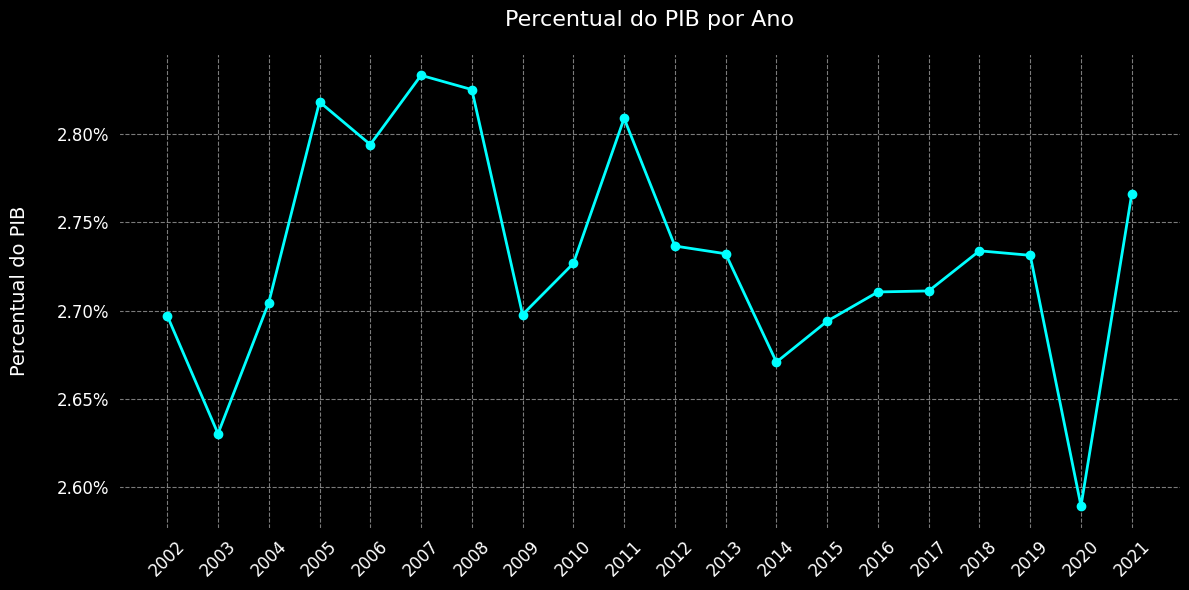

In [127]:
# Agrupar por ano e calcular a média do percentual do PIB
data_grouped = data.groupby('Ano-calendário')['Percentual do PIB'].mean().reset_index()

# Configurar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(data_grouped['Ano-calendário'], data_grouped['Percentual do PIB'], marker='o', color='cyan', linestyle='-', linewidth=2, markersize=6)

# Adicionar título e rótulos
plt.title('Percentual do PIB por Ano', fontsize=16, color='white', pad=20)
plt.ylabel('Percentual do PIB', fontsize=14, color='white', labelpad=20)

# Ajustar formatação dos eixos e cores
plt.xticks(data_grouped['Ano-calendário'], rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Em relação ao gráfico "Percentual do PIB por Ano", é possível observar as variações no percentual do PIB do país ao longo dos anos. Durante a crise financeira de 2008, há uma queda perceptível de aproximadamente 0,1 pontos percentuais. Comparativamente, durante a pandemia de Covid-19, a queda foi mais acentuada, com uma redução de cerca de 0,15 pontos percentuais. Isso indica que a pandemia teve um impacto econômico mais severo sobre o país do que a crise financeira de 2008.

A seguir, analisaremos a composição da receita tributária brasileira, detalhando os principais tributos arrecadados e avaliando a participação relativa de cada esfera de governo — federal, estadual e municipal — na geração dessas receitas.

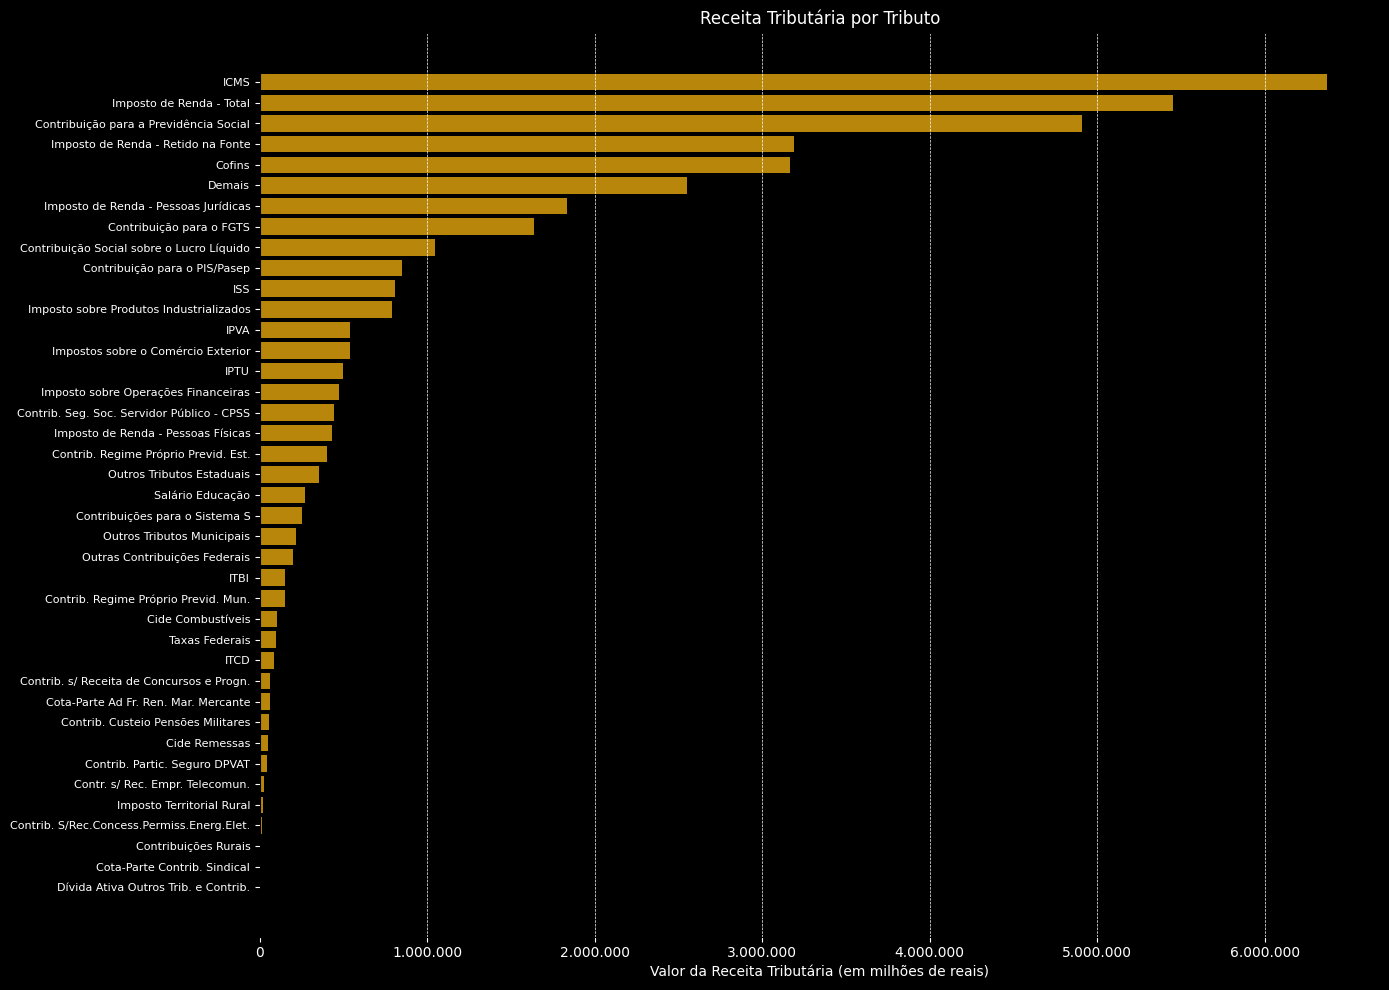

In [128]:
# Aplicar os filtros diretamente na variável "data"
data = data[data['Competência'] != 'Total dos Tributos União']
agrupadores = [
    'Total da Receita Tributária',
    'Orçamento Fiscal',
    'Orçamento Seguridade Social',
    'Tributos do Governo Federal',
    'Tributos do Governo Estadual',
    'Tributos do Governo Municipal'
]
data = data[~data['Descrição'].isin(agrupadores)]

# Agrupar e ordenar
data_agrupada = data.groupby('Descrição')['Valor da Receita Tributária'].sum().reset_index()
data_agrupada = data_agrupada.sort_values(by='Valor da Receita Tributária', ascending=False)

# Função para formatar eixo y
import matplotlib.ticker as ticker
def format_y_axis(x, _):
    return f'{x:,.0f}'.replace(',', '.')

# Gerar gráfico
plt.figure(figsize=(14, 10))
plt.barh(data_agrupada['Descrição'], data_agrupada['Valor da Receita Tributária'], color='#B8860B')
plt.title('Receita Tributária por Tributo', color='white')
plt.xlabel('Valor da Receita Tributária (em milhões de reais)', color='white')

# Ajustes de formatação
ax = plt.gca()
ax.invert_yaxis()
ax.tick_params(axis='y', labelsize=8, colors='white')  # eixo Y
ax.tick_params(axis='x', labelsize=10, colors='white')  # eixo X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='x', color='white', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

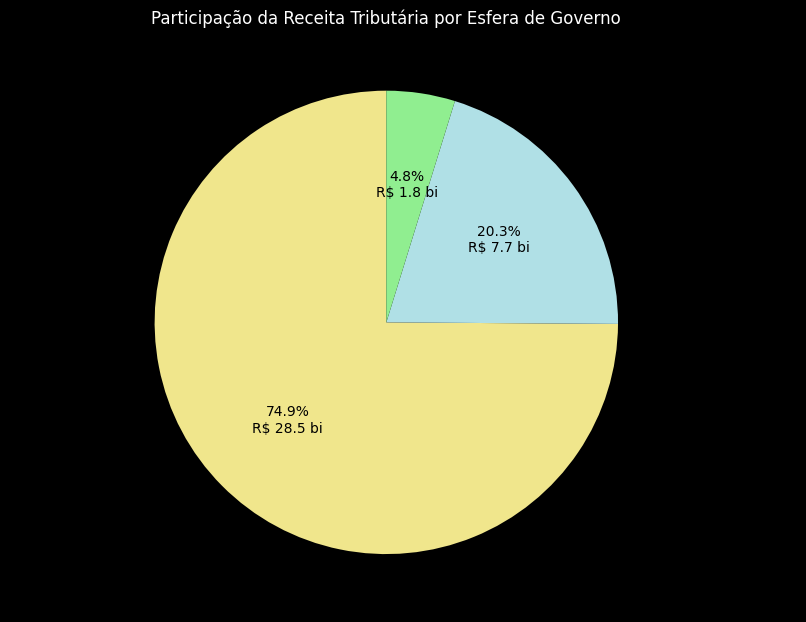

In [129]:
# Função formatadora
def formatar_valor_em_bilhoes(pct, allvals):
    total = sum(allvals)
    valor = pct * total / 100
    return f'{pct:.1f}%\nR$ {valor / 1_000_000:.1f} bi'

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    receita_por_competencia['Valor da Receita Tributária'],
    labels=receita_por_competencia['Competência'],
    autopct=lambda pct: formatar_valor_em_bilhoes(pct, receita_por_competencia['Valor da Receita Tributária']),
    startangle=90,
    colors=['#F0E68C', '#B0E0E6', '#90EE90'],
    textprops={'color': 'black'}
)

plt.title('Participação da Receita Tributária por Esfera de Governo', color='white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.tight_layout()
plt.show()

Os dados analisados demonstram a composição da arrecadação tributária no Brasil, tanto sob a perspectiva do valor arrecadado por tipo de tributo quanto da sua distribuição entre as esferas de governo — federal, estadual e municipal.
O ICMS (Imposto sobre Circulação de Mercadorias e Serviços) lidera o ranking dos tributos com maior arrecadação, evidenciando sua relevância no financiamento dos governos estaduais. Na sequência, destacam-se tributos federais como:

- Contribuição para a Previdência Social
- Imposto de Renda (em suas várias formas — pessoas físicas, jurídicas e retido na fonte)
- Cofins e PIS/Pasep, que incidem sobre o faturamento das empresas
- CSLL (Contribuição Social sobre o Lucro Líquido)

Isso mostra que, embora o ICMS seja o tributo individual mais arrecadado, a esfera federal concentra diversos tributos de alta arrecadação agregada. Apesar do peso do ICMS, os dados mostram que a União centraliza a maior parte da arrecadação tributária, tanto em diversidade quanto em volume agregado de tributos. Já os municípios, embora com autonomia tributária sobre IPTU, ISS e ITBI, apresentam participação modesta no total arrecadado.

---


# Conclusão

A análise da arrecadação tributária brasileira evidencia diversos aspectos estruturais e conjunturais relevantes.

A maior parte da receita tributária é concentrada na União, que responde por aproximadamente 74% da arrecadação total. Essa centralização pode limitar a autonomia financeira de estados e municípios, que arrecadam cerca de 20% e 6%, respectivamente.

Apesar disso, o ICMS, tributo estadual que, como já observado anteriormente, é o imposto individual com maior arrecadação no país. Esse dado destaca o papel fundamental dos estados na estrutura arrecadatória, ainda que a soma dos tributos federais supere em volume total. A arrecadação dos municípios permanece limitada, mesmo com autonomia para tributar atividades locais por meio do ISS, IPTU e ITBI. Isso reforça a necessidade de discutir mecanismos de redistribuição de receitas e fortalecimento da base fiscal local.

A esfera federal concentra a maior diversidade de tributos relevantes, como IR, CSLL, Cofins, PIS/Pasep e contribuições sociais, o que proporciona uma base de arrecadação ampla e menos dependente de um único tributo.

O período da pandemia da Covid-19 intensificou os desafios econômicos do país. O fechamento de negócios, medidas restritivas e a desaceleração da atividade econômica global provocaram uma das maiores quedas do PIB em décadas. Essa crise escancarou a vulnerabilidade fiscal de entes subnacionais mais dependentes de repasses e de bases tributárias ligadas ao consumo e à atividade econômica.

Diante do cenário apresentado, torna-se evidente a importância de reformas que promovam maior equilíbrio na arrecadação entre as esferas de governo e uma estrutura tributária mais justa, eficiente e resiliente frente a crises econômicas.

---



# Possibilidades de Expansão da Análise

A partir dos resultados obtidos neste estudo, identificam-se diferentes caminhos que podem ser explorados para aprofundar a compreensão sobre a estrutura tributária brasileira:

1. Análise temporal da arrecadação por tributo:
Explorar a evolução histórica dos principais tributos ao longo dos anos poderia revelar tendências estruturais, efeitos de crises econômicas ou impactos de alterações legislativas.

2. Correção dos valores pela inflação:
Ajustar os valores da receita tributária com base em índices de preços permitiria comparar os dados em termos reais, favorecendo uma avaliação mais precisa da variação do poder arrecadatório ao longo do tempo.

3. Desagregação regional da arrecadação:
Caso haja dados disponíveis por unidade federativa, seria possível analisar a receita por estado ou município, o que ajudaria a compreender desigualdades regionais na arrecadação e na dependência de repasses federais.

4. Comparação com indicadores socioeconômicos:
Relacionar a receita tributária com dados como PIB per capita, IDH ou população poderia trazer novos insights sobre equidade tributária, capacidade contributiva e eficiência arrecadatória entre regiões.